### Constructing a Pandas Dataframe from python datastructures


In [9]:
from IPython.display import Image
import pandas as pd
import numpy as np

This is the dataframe we are trying to build. The column names are in bold, and the index (row number) is also in bold. Note that a dataframe can be thought of as a table, with rows and columns. So, any datastructure we use will be two levels deep, one to put the columns together, and another to put rows together. Fortunately, we almost never have to write these manually. Typically, we are reading in some data, and these are constructed in a loop. 
Also, `NaN` in the table is really a `np.nan`, so we need to use `np.nan` when building tables. Or use `None` and later use `.fillna(value=np.nan, inplace=True)` on the dataframe built.

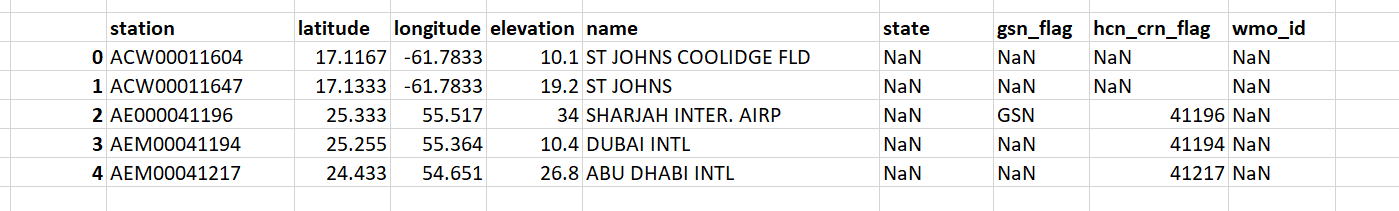

In [2]:
Image(filename="images/1.PNG")

### Method 1: List of lists
Now consider only the body of the dataframe, as shown below


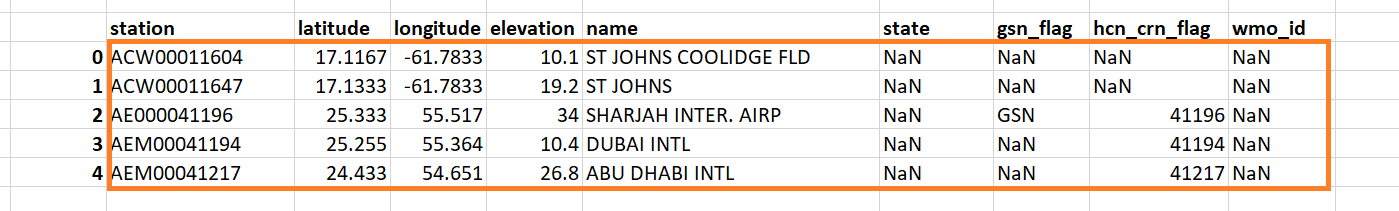

In [3]:
Image(filename="images/2.PNG")

Each row can be thought of as a list, so it would be
```
[ACW00011604, 17.1167,	-61.7833, 10.1,	ST JOHNS COOLIDGE FLD, NaN,	NaN,NaN,NaN ]
[ACW00011647,	17.1333,	-61.7833,	19.2,	ST JOHNS,	NaN,	NaN,	NaN,	NaN]
[AE000041196,	25.333,	55.517,	34,	SHARJAH INTER. AIRP,	NaN,	GSN,	41196,	NaN]
[AEM00041194,	25.255,	55.364,	10.4,	DUBAI INTL,	NaN,	NaN,	41194,	NaN]
[AEM00041217,	24.433,	54.651,	26.8,	ABU DHABI INTL,	NaN,	NaN,	41217,	NaN]
```
All rows are appended together into another list, creating a list of lists so that we have one variable to deal with, instead of each list independently. Inversely, a list of list can be pictured like a table above - each inner list is a row, the outer level is just to put it all together in one container. 

In [4]:
list_of_lists = [['ACW00011604', 17.1167,    -61.7833, 10.1,    'ST JOHNS COOLIDGE FLD', np.nan,  np.nan , np.nan , np.nan ],
['ACW00011647',    17.1333,    -61.7833,    19.2,    'ST JOHNS',    np.nan,    np.nan,    np.nan,    np.nan],
['AE000041196',    25.333,    55.517,    34,    'SHARJAH INTER. AIRP',    np.nan,    'GSN',    41196,    np.nan],
['AEM00041194',    25.255,    55.364,    10.4,    'DUBAI INTL',    np.nan,    np.nan,    41194,    np.nan],
['AEM00041217',    24.433,    54.651,    26.8,    'ABU DHABI INTL',    np.nan,    np.nan,    41217,    np.nan]]

In [5]:
pd.DataFrame(list_of_lists, columns =['station','latitude','longitude','elevation','name','state','gsn_flag',
                                     'hcn_crn_flag','wmo_id'] )

,station,latitude,longitude,elevation,name,state,gsn_flag,hcn_crn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0,NaN
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0,NaN


### Method 2: Dictionary of lists
Another way to look at the table is to look at each column as a building block.

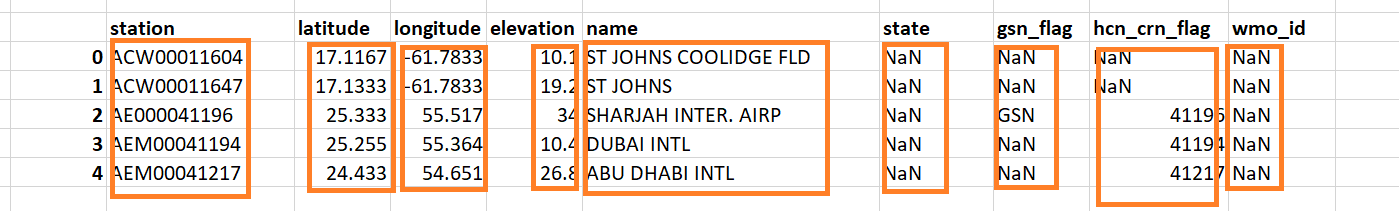

In [6]:
Image(filename="images/3.PNG")

Each column can be represented as a list
```
station = [ACW00011604, ACW00011647, AE000041196, AEM00041194, AEM00041217]
latitude = [17.1167, 17.1333, 25.333, 25.255, 24.433]
longitude = [-61.7833, -61.7833, 55.517, 55.364, 54.651]
elevation = [10.1, 19.2, 34, 10.4, 26.8]
name = [ST JOHNS COOLIDGE FLD, ST JOHNS, SHARJAH INTER. AIRP, DUBAI INTL, ABU DHABI INTL]
state = [np.nan, np.nan, np.nan, np.nan, np.nan]
gsn_flag = [np.nan, np.nan, GSN, np.nan, np.nan]
hch_crn_flag = [np.nan, np.nan, 41196, 41194, 41217]
wmo_id = [np.nan, np.nan, np.nan, np.nan, np.nan]
```
One convenient way to store all of this would be a dictionary like this

In [7]:
dict_of_lists = {'station' : ['ACW00011604', 'ACW00011647', 'AE000041196', 'AEM00041194', 'AEM00041217'],
        'latitude' : [17.1167, 17.1333, 25.333, 25.255, 24.433],
        'longitude' : [-61.7833, -61.7833, 55.517, 55.364, 54.651],
        'elevation' : [10.1, 19.2, 34, 10.4, 26.8],
        'name' : ['ST JOHNS COOLIDGE FLD', 'ST JOHNS', 'SHARJAH INTER. AIRP', 'DUBAI INTL', 'ABU DHABI INTL'],
        'state' : [np.nan, np.nan, np.nan, np.nan, np.nan],
        'gsn_flag' : [np.nan, np.nan, 'GSN', np.nan, np.nan],
        'hch_crn_flag' : [np.nan, np.nan, 41196, 41194, 41217],
        'wmo_id' : [np.nan, np.nan, np.nan, np.nan, np.nan]}
pd.DataFrame(dict_of_lists)

,station,latitude,longitude,elevation,name,state,gsn_flag,hch_crn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0,NaN
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0,NaN


### Method 3: List of Dictionaries 
Yet another way to look at each row is to consider them a pair with column name and value (aka, a dictionary), like this
```
{station : ACW00011604, latitude : 17.1167,	longitude : -61.7833, elevation : 10.1,	name : ST JOHNS COOLIDGE FLD, state : NaN,	gsn_flag: NaN, hch_crn_flag : NaN, wmo_id : NaN}
{station : ACW00011647,	latitude : 17.1333,	longitude : -61.7833, elevation :  19.2, name : ST JOHNS,state : 	NaN,gsn_flag: 	NaN,	hch_crn_flag : NaN,	wmo_id : NaN}
{station : AE000041196,	latitude : 25.333,	longitude : 55.517,	elevation : 34,	name : SHARJAH INTER. AIRP,	state : NaN,gsn_flag: 	GSN,	hch_crn_flag : 41196, wmo_id : 	NaN}
{station : AEM00041194,	latitude : 25.255,	longitude : 55.364,	elevation : 10.4,name : DUBAI INTL, state : 	NaN,	gsn_flag: NaN,	hch_crn_flag : 41194,wmo_id : 	NaN}
{station : AEM00041217,	latitude : 24.433,	longitude : 54.651,	elevation : 26.8, name : ABU DHABI INTL, state : 	NaN,gsn_flag: 	NaN,	hch_crn_flag : 41217,	wmo_id : NaN}
```
That is, each row is a dictionary with column name specified explicitly. All these rows are put together as a list then.

In [8]:
list_of_dicts = [{'station' : 'ACW00011604', 'latitude' : 17.1167,'longitude' : -61.7833, 'elevation' : 10.1,'name' : 'ST JOHNS COOLIDGE FLD', 'state' : np.nan,'gsn_flag': np.nan, 'hcn_crn_flag' : np.nan, 'wmo_id' : np.nan},
{'station' : 'ACW00011647', 'latitude' : 17.1333,'longitude' : -61.7833, 'elevation' :  19.2, 'name' : 'ST JOHNS','state' : np.nan,'gsn_flag': np.nan,'hcn_crn_flag' : np.nan,'wmo_id' : np.nan},
{'station' : 'AE000041196', 'latitude' : 25.333,'longitude' : 55.517,'elevation' : 34,'name' : 'SHARJAH INTER. AIRP','state' : np.nan,'gsn_flag': 'GSN','hcn_crn_flag' : 41196, 'wmo_id' : np.nan},
{'station' : 'AEM00041194', 'latitude' : 25.255,'longitude' : 55.364,'elevation' : 10.4,'name' : 'DUBAI INTL', 'state' : np.nan,'gsn_flag': np.nan,'hcn_crn_flag' : 41194,'wmo_id' : np.nan},
{'station' : 'AEM00041217', 'latitude' : 24.433,'longitude' : 54.651,'elevation' : 26.8, 'name' : 'ABU DHABI INTL', 'state' : np.nan,'gsn_flag': np.nan,'hcn_crn_flag' : 41217,'wmo_id' : np.nan}]
pd.DataFrame(list_of_dicts, columns =['station','latitude','longitude','elevation','name','state','gsn_flag',
                                     'hcn_crn_flag','wmo_id'])

,station,latitude,longitude,elevation,name,state,gsn_flag,hcn_crn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0,NaN
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0,NaN
